In [1]:
import pandas as pd
import numpy as np
#Pandas Library is used for Data Manipulation and Analysis
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
from sklearn.model_selection import GridSearchCV

## Data cleaning

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Project-Applied Programming/Project-Code/Training_Data.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
4,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
...,...,...,...,...,...,...,...,...,...
3172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
3173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
3174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
3175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


**Let's check for the data type of the features of our data set**

In [ ]:
df.info()

We can see that our data set is made of 7 attributes type float, one attribute of type object and one attribute of type integer. We will have to convert our object attribute to numeric. Also, there is no non null values

## The Rings feature represents the number of rings. By adding 1.5 to this number we can compute the age of the abalone, in years. Let's do that

In [3]:
# we add 1.5 to the ring feature then create a new column age to replace the existing ring
df['age'] = df['Rings']+1.5
df.drop('Rings', axis=1, inplace=True)

In [ ]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
3,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,9.5
4,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,21.5
...,...,...,...,...,...,...,...,...,...
3172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
3173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
3174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
3175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


## **Let's do some visualization first to have a better understanding of our data**

**For the categorical Let's look at the relationship between "Sex" and our target variable "Age"**


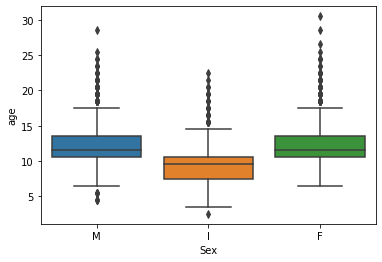

In [ ]:
sns.boxplot(x="Sex", y="age", data=df)

<p>We see that the distributions of sex between the different age categories have a significant overlap, so sex would not be a good predictor of age.</p>

**Visualisation of continuous numerical variable**

<p>We can observe a positive linear relationship between Height and age. It could be a good predicator as well<p>

(0.0, 31.9)

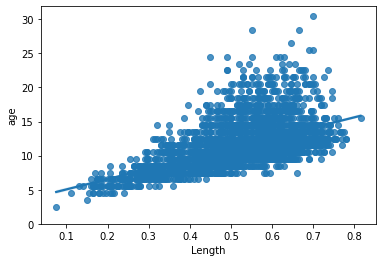

In [ ]:
# Length as potential predictor variable of age
sns.regplot(x="Length", y="age", data=df)
plt.ylim(0,)

<p>As the length goes up, the age goes up: this indicates a positive direct correlation between these two variables. Length seems like a pretty good predictor of age since the regression line is almost a perfect diagonal line.</p>

In [ ]:
# Lets look at the corrolation between the two statistically way

df[['Length', 'age']].corr()

,Length,age
Length,1.000000,0.553658
age,0.553658,1.000000


(0.0, 31.9)

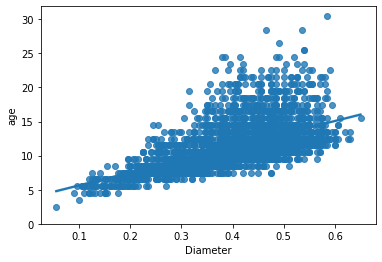

In [ ]:
# Diameter as potential predictor variable of age
sns.regplot(x="Diameter", y="age", data=df)
plt.ylim(0,)

In [ ]:
# Lets look at the corrolation between the two in another way

df[['Diameter', 'age']].corr()

,Diameter,age
Diameter,1.000000,0.572947
age,0.572947,1.000000


<p>As with the length attribute, a positive direct correlation between Diameter and age is observe. Diameter seems like a pretty good predictor of age since the regression line is almost a perfect diagonal line.</p>

(0.0, 66.40544747198561)

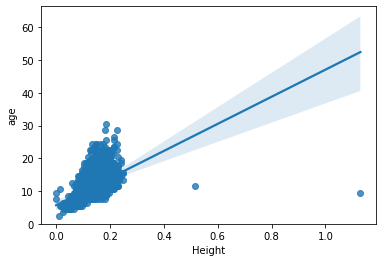

In [ ]:
# Height as potential predictor variable of age
sns.regplot(x="Height", y="age", data=df)
plt.ylim(0,)

In [ ]:
# Lets look at the corrolation between the two in another way

df[['Height', 'age']].corr()

,Height,age
Height,1.000000,0.542154
age,0.542154,1.000000


(0.0, 31.9)

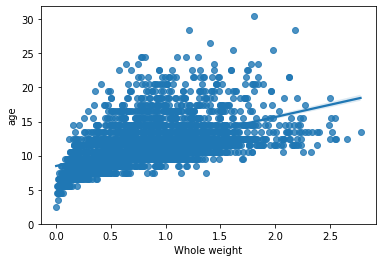

In [ ]:
# Whole weight as potential predictor variable of age
sns.regplot(x="Whole weight", y="age", data=df)
plt.ylim(0,)

In [ ]:
# Lets look at the corrolation between the two in another way

df[['Whole weight', 'age']].corr()

,Whole weight,age
Whole weight,1.000000,0.538557
age,0.538557,1.000000


<p>There is a positive relation between Whole weight and age </p>

(0.0, 31.9)

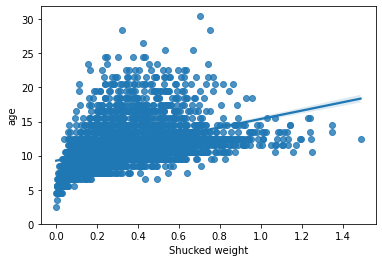

In [ ]:
# Shucked weight as potential predictor variable of age
sns.regplot(x="Shucked weight", y="age", data=df)
plt.ylim(0,)

In [ ]:
# Lets look at the corrolation between the two in another way

df[['age', 'Shucked weight']].corr()

<p>As with the previous features, we can see a linear regression line. This feature could be a good predicator</p>

(0.0, 31.9)

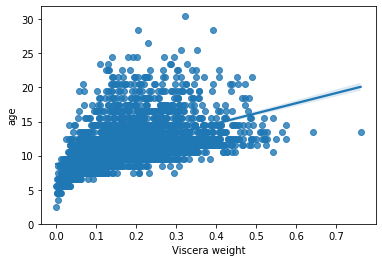

In [ ]:
# Viscera weight as potential predictor variable of age
sns.regplot(x="Viscera weight", y="age", data=df)
plt.ylim(0,)

In [ ]:
# Lets look at the corrolation between the two in another way

df[['Viscera weight', 'age']].corr()

<p>We can see a positive linear relationship between the two. Viscera could be a good predicator for age</p>

(0.0, 31.9)

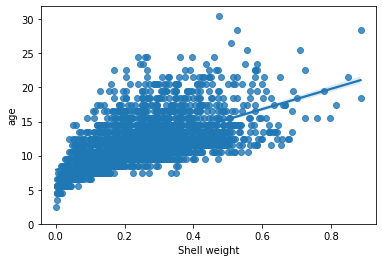

In [ ]:
# Shell weight as potential predictor variable of age
sns.regplot(x="Shell weight", y="age", data=df)
plt.ylim(0,)

In [ ]:
# Lets look at the corrolation between the two in another way

df[['Shell weight', 'age']].corr()

,Shell weight,age
Shell weight,1.000000,0.630342
age,0.630342,1.000000


<p>We can see a positive linear relationship between the two. Shell weight could be a good predicator for age</p>

## Correlation and Causation. We will evaluate the correlation using the p-value. 
<p>The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [ ]:
from scipy import stats

In [ ]:
# Length vs age
pearson_coef, p_value = stats.pearsonr(df['Length'], df['age'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5536576111202974  with a P-value of P = 1.0769897270871875e-254


Since the p-value is > 0.1, the correlation between length and age is statistically insignifiant although the linear relationship is extremely strong (~0.55)

In [ ]:
# Diameter vs age
pearson_coef, p_value = stats.pearsonr(df['Diameter'], df['age'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5729469495193151  with a P-value of P = 1.1644954340014663e-276


Since the p-value is > 0.1, the correlation between Diameter and age is statistically insignifiant although the linear relationship is extremely strong (~0.57)

In [ ]:
#Height vs age
pearson_coef, p_value = stats.pearsonr(df['Height'], df['age'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5421544312589757  with a P-value of P = 2.890728886661771e-242


Since the p-value is > 0.1, the correlation between Diameter and age is statistically insignifiant although the linear relationship is extremely strong (~0.54)

In [ ]:
#Whole weight vs age
pearson_coef, p_value = stats.pearsonr(df['Whole weight'], df['age'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5385573651910691  with a P-value of P = 1.775557523289229e-238


Since the p-value is > 0.1, the correlation between Diameter and age is statistically insignifiant although the linear relationship is extremely strong (~0.53)

In [ ]:
#Whole Shucked weight vs age
pearson_coef, p_value = stats.pearsonr(df['Shucked weight'], df['age'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.417143184163258  with a P-value of P = 5.356560810700925e-134


Since the p-value is > 0.1, the correlation between Diameter and age is statistically insignifiant although the linear relationship is extremely strong (~0.41)

In [ ]:
#Viscera weight weight vs age
pearson_coef, p_value = stats.pearsonr(df['Viscera weight'], df['age'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.49959558711333013  with a P-value of P = 3.042774751268224e-200


In [ ]:
#Shell weight vs age
pearson_coef, p_value = stats.pearsonr(df['Shell weight'], df['age'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.6303419332849853  with a P-value of P = 0.0


This result shows that there is an extremely strong evidence that the correlation is significant as the difference between two attributes is zero. Shell weight most is definitely the most important attribute to predict the age of the abalone

**Since it is a regression problem, we would not want how features to be highly corrolated amongst themself. So l'est visualise using a correlation matrix**

Text(0.5, 1.0, 'pearson correlation')

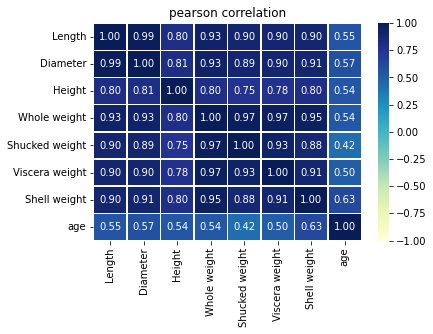

In [ ]:
corr_matrix = df.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

**We can observe that there is a strong correlation amongst features'. This will not be good for any regression model as we will see next. Also, as the calcul of p-values showed only one feature has a statistiscally significance toward the target column. This is mainly due to the gap we can observe between the differents features values (<1) and the target feature whose values are very high compare to the dependents variable. This also is a problem that will affect our regression**

In [5]:
# remove the "Sex" attribute from our dataset

data = df.drop(['Sex'], axis=1)

# **Now we can build and evaluate our model. The initials results will determine what will need to be done next. e.g: Tuning our model to improve its performance**

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
# Separate the dataset in two
X = data.iloc[:,:-1].values
y = data.loc[:, 'age'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y

array([16.5,  8.5, 11.5, ..., 10.5, 11.5, 13.5])

In [ ]:
# We create four pipeline related to the four model we will  build and evaluate
LinearReg = make_pipeline(LinearRegression())
RidgeReg =  make_pipeline(Ridge(random_state=0))
AdaReg = make_pipeline(AdaBoostRegressor(n_estimators=100, random_state=0))
SvmModel = make_pipeline(SVR())


In [ ]:
#This list contains all my models
lst_of_models = {'LinearReg': LinearReg,
                 'RidgeReg':RidgeReg,
                 'AdaReg':AdaReg,
                 'SvmModel':SvmModel
                 }

In [ ]:
lst_of_models.items()

In [ ]:
# I create a function that will perform all the necessary operation necessary for the evaluation of our models
# the function will calculate two metrics: le mean squared error (MSE) and the r2 score

from sklearn.model_selection import cross_val_score
def evaluate(model):
  model.fit(X_train, y_train)
  ypred = model.predict(X_test)
  ypredTrain = model.predict(X_train)

  mse_train = ((mean_absolute_error(y_train, ypredTrain)))
  mse_test = ((mean_absolute_error(y_test, ypred)))
  r2_score=metrics.r2_score(y_test,ypred)
  r2_score_train=metrics.r2_score(y_train,ypredTrain)

  print("Le MSE sur le training est {}\n".format(mse_train))
  print("Le MSE sur le testing est {}".format(mse_test))
  print("The R2 of the model {}".format(r2_score))
  print("The R2 of the model {}".format(r2_score_train))

<p>The skill or performance of a regression model must be reported as an error in those predictions.

This actually makes sense. If we are predicting a numeric value like a height or a dollar amount, we don’t want to know if the model predicted the value exactly (which could be intractably difficult in practice); instead, we want to know how close the predictions were to the expected values
NB: A perfect mean absolute error or mean squared value is 0.0, which means that all predictions matched the expected values exactly.</p>

In [ ]:
# We use the for loop to go though all the models at once rather than having to deal with each model one at the time
for name, model in lst_of_models.items():
  print(name)
  evaluate(model)

LinearReg
Le MSE sur le training est 1.5958199160241267

Le MSE sur le testing est 1.6797203913214696
The R2 of the model 0.4961601754270508
The R2 of the model 0.5388333096153124
RidgeReg
Le MSE sur le training est 1.6081283605178591

Le MSE sur le testing est 1.6874747696055599
The R2 of the model 0.517101788121932
The R2 of the model 0.530637951498409
AdaReg
Le MSE sur le training est 2.271218629868169

Le MSE sur le testing est 2.2594746388957323
The R2 of the model 0.3076705562465447
The R2 of the model 0.3344787123532631
SvmModel
Le MSE sur le training est 1.516752742706555

Le MSE sur le testing est 1.6075185567732064
The R2 of the model 0.5024125756073821
The R2 of the model 0.5221392960925804


The results shows that the linear regression model and the ridge perform better than the others models with approximatively a MAE = 1.67 and MSE = 5.49 for the linear,  and MEA = 1.68 and MSE = 5.27. The best of the two been the Ridge with a lower MSE. Still as expected for our data analysis and vusualisation, the models do not perform well. Such models could not be commercialise. 

## Let's test our best model with cross validation approach. 

In [9]:
df1 = data.copy()

In [10]:
X = df1.drop('age', axis=1)
y = df1['age']

In [ ]:
y

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
from sklearn.linear_model import LinearRegression
lre = LinearRegression()
Rcross = cross_val_score(lre, X, y, scoring = 'r2' ,cv=kf)

print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.3815606133839936 and the standard deviation is 0.15697136476310963


In [ ]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre,X, y,cv=4)
for i in range(len(y)):
	# report error
	print(y[i], yhat[i])

**The results are still not encouraging. As mentionned earlier, this was previsible in some was as the values of our features set were to differents from the target. That was demonstrate by the calcul of the p-value of each feature. One solution could be transforming our problem to a classification one.**

In [12]:
#Let's create a copy of our data set

df2 = df1.copy()

In [13]:
df2['age'] = df['age']+1.5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f249b989a90>]],
      dtype=object)

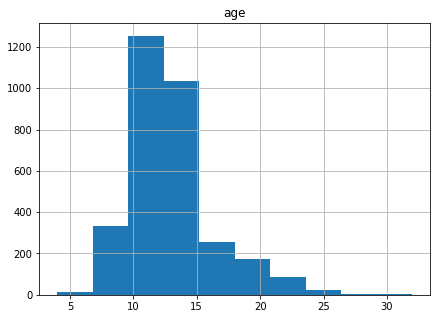

In [14]:
# Now Let's have a closer look at the age columns
df2.hist('age', bins=10, figsize=(7,5))

In [ ]:
df2['age'].describe()

count    3177.000000
mean       12.964432
std         3.270882
min         4.000000
25%        11.000000
50%        12.000000
75%        14.000000
max        32.000000
Name: age, dtype: float64

**We can observe that the average age is around 11. Also the minimum age is 2.5 and the maximum 30. However, 75% fall under the age 12. These informations could be usefull for categorization or binning. I will create three bins (categorical) for differents age groups: [2,5-9.5, 9.5 12.5, 12.5 30.5]**

In [15]:
#creation of three bins
df2['age'], cut_bin = pd.qcut(df2['age'], q = 3, labels = ['4-11', '12-14', '15-'], retbins = True)

In [16]:
df2['age'].value_counts()

12-14    1367
4-11     1069
15-       741
Name: age, dtype: int64

In [17]:
#display the bins created
print (cut_bin)

[ 4. 11. 14. 32.]


In [18]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif

Xf = df2.drop('age', axis=1)
yf = df2['age']

#X_trainC, X_testC, y_trainC, y_testC = train_test_split(Xc, yc, test_size=0.2, random_state=42)

In [19]:
def classification(Modelc):
  Modelc.fit(Xf, yf)
  Class_score = cross_val_score(Modelc, Xf, yf, scoring = 'accuracy' ,cv=5)
  print(Class_score.mean())

In [20]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=5))

In [21]:
SvmModel = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
LogisticRegression = make_pipeline(preprocessor, LogisticRegression(random_state=0))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))

In [22]:
model_list = {'SvmModel':SvmModel,
              'LogisticRegression':LogisticRegression,
              'RandomForest':RandomForest}

In [23]:
for name, model in model_list.items():
  print(name)
  classification(model)
  

SvmModel
0.6440107958203337
LogisticRegression
0.6257554598128064
RandomForest
0.6055905511811024


**We obtain a score of 67% of accuracy which is better than the previous score but still not good enougth. We will now create a binary target class.**

In [36]:
df3 = data.copy()

In [38]:
#df3['age'] = df3['age']+1.5

In [40]:
df3['age'], cut_bin = pd.qcut(df3['age'], q = 2, labels = ['B', 'A'], retbins = True)

In [41]:
df3

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,A
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,B
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,A
3,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,B
4,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,A
...,...,...,...,...,...,...,...,...
3172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,A
3173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,A
3174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,B
3175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,A


In [42]:
df3['age'].value_counts()

B    1599
A    1578
Name: age, dtype: int64

In [43]:
print (cut_bin)

[ 2.5 10.5 30.5]


In [44]:
Xf = df3.drop('age', axis=1)
yf = df3['age']

#X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=0.2, random_state=42)

In [45]:
for name, model in model_list.items():
  print(name)
  classification(model)

SvmModel
0.7658064675877778
LogisticRegression
0.7585673253107512
RandomForest
0.7686366562670233


In [46]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

hyper_params1 = {'criterion':['gini', 'entropy'],
                'max_depth':range(2,10, 1),
                 'min_samples_split': range(1,10,1),
                 'min_samples_leaf': range(1,10, 1),
                 'max_features':['sqrt', 'log']
               }

model = RandomizedSearchCV(RandomForestClassifier(), hyper_params1, scoring='accuracy', cv=4, n_iter=40)

In [ ]:
model.fit(Xf, yf)

In [50]:
print(model.best_params_)

yy = model.predict(Xf)
print(model.score(yf, yy))

{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'gini'}


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: ignored

array(['B', 'B', 'B', ..., 'A', 'A', 'A'], dtype=object)

*hyperparameter found: 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'entropy'*

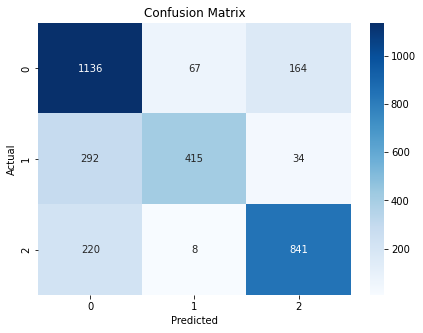

In [ ]:
cm = confusion_matrix(yf, yy)

plt.figure(figsize = (7,5))

# Create Confusion Matrix
b = sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')

# Set the Title
b.set(title='Confusion Matrix')

# Set the Labels
b.set(xlabel='Predicted', ylabel='Actual')

# Display the Confusion Matrix
plt.show()

In [ ]:
yf.head(5)

0      15-
1     4-11
2    12-14
3     4-11
4      15-
Name: age, dtype: category
Categories (3, object): ['4-11' < '12-14' < '15-']

Deployment

In [ ]:
import pickle
import numpy as np
from flask import Flask, request, jsonify


filename = 'savemodel.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
load_model = pickle.load(open(filename, 'rb'))

In [ ]:
load_model.predict([[1.1, 0.415, 0.150, 0.7775, 0.2370, 0.1415,0.330 ]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['15-'], dtype=object)

In [ ]:
Xf

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
3,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
4,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300
...,...,...,...,...,...,...,...
3172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
3173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
3174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
3175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960
